In [74]:
# Gerekli kütüphaneleri import edelim (Import the necessary libraries)
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from textblob import TextBlob
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np


In [17]:
# Türkçe stop words yüklenmesi (Load Turkish stop words)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aziz-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aziz-\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aziz-\AppData\Roaming\nltk_data...


True

In [15]:
# Türkçe ve İngilizce stop words (Turkish and English stop words)
stop_words_tr = stopwords.words('turkish')
stop_words_en = stopwords.words('english')

In [11]:
# Lemmatizer (kelimeleri köklerine ayırma) (Lemmatizer to reduce words to their roots)
lemmatizer = WordNetLemmatizer()

In [28]:
data=pd.read_csv("banka.csv")

In [30]:
# Veri setinin ilk birkaç satırını gösterelim (Display the first few rows of the dataset)
print(data.head())

                                      metin                 kategori
0        kart şifremi değiştirmek istiyorum  Kart Şifresi Değiştirme
1  kartımın şifresini değiştirmek istiyorum  Kart Şifresi Değiştirme
2          kredi kartımın şifresini unuttum  Kart Şifresi Değiştirme
3               kart şifremi hatırlamıyorum  Kart Şifresi Değiştirme
4              kart şifresi almak istiyorum  Kart Şifresi Değiştirme


In [32]:
# Metin ön işleme fonksiyonu (Text preprocessing function)
def preprocess_text(text):
    # Küçük harfe çevir (Convert to lowercase)
    text = text.lower()
    # Noktalama ve özel karakterleri temizle (Remove punctuation and special characters)
    text = re.sub(r'[^a-zA-ZğüşöçİıĞÜŞÖÇ\s]', '', text)
    # Stop words temizleme (Remove stop words)
    text = " ".join([word for word in text.split() if word not in stop_words_tr and word not in stop_words_en])
    # Lemmatizasyon (kelimelerin köklerine indirgenmesi) (Lemmatization to reduce words to their root forms)
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [34]:
# Veri setine ön işleme uygulama (Apply preprocessing to the dataset)
data['temizlenmis_metin'] = data['metin'].apply(preprocess_text)

In [36]:
# Kelime bulutu oluşturma (Word Cloud)
# Metinlerin birleşimi (Combine all texts)
text_combined = " ".join(data['temizlenmis_metin'])

In [38]:
# Kelime bulutunu oluşturma (Generate the word cloud)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

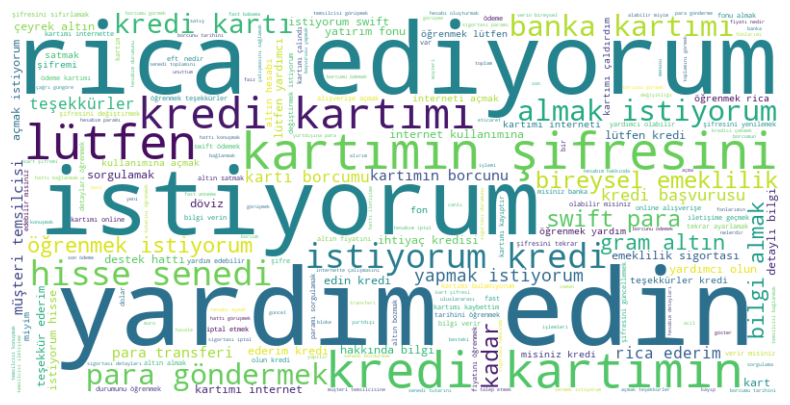

In [40]:
# Kelime bulutunu görselleştirme (Visualize the word cloud)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizle (Hide axes)
plt.show()

In [42]:
# Metin Sınıflandırma (Text Classification)
# Veri setini eğitim ve test olarak bölelim (Split dataset into train and test)
X = data['temizlenmis_metin']
y = data['kategori']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# TF-IDF vektörlemesi (TF-IDF Vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [46]:
# Naive Bayes sınıflandırma modelini eğitme (Train Naive Bayes classification model)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [48]:
# Model ile tahmin yapma (Make predictions using the model)
y_pred = model.predict(X_test_tfidf)

In [50]:
# Sonuçları değerlendirme (Evaluate the results)
print(classification_report(y_test, y_pred))

                         precision    recall  f1-score   support

            Altın Döviz       0.93      0.96      0.95        28
                    BES       1.00      0.96      0.98        25
               EFT FAST       0.93      0.88      0.90        16
       Hisse Senedi Fon       1.00      0.96      0.98        25
             Kart Kayıp       1.00      0.84      0.91        19
Kart Şifresi Değiştirme       0.95      1.00      0.97        18
        Kredi Başvurusu       1.00      0.88      0.94        25
      Kredi Kartı Borcu       0.84      0.95      0.89        22
     Müşteri Temsilcisi       1.00      1.00      1.00        17
      Swift ve Yurtdışı       0.83      0.94      0.88        16
         İnternete açma       0.91      1.00      0.95        21

               accuracy                           0.94       232
              macro avg       0.95      0.94      0.94       232
           weighted avg       0.95      0.94      0.94       232



In [52]:
# Duygu Analizi (Sentiment Analysis)
def sentiment_analysis(text):
    # TextBlob kullanarak duygu analizi (Sentiment analysis using TextBlob)
    analysis = TextBlob(text)
    # Pozitif, negatif veya nötr sınıflandırması (Classify as positive, neutral, or negative)
    if analysis.sentiment.polarity > 0:
        return 'Pozitif'  # Positive
    elif analysis.sentiment.polarity == 0:
        return 'Nötr'  # Neutral
    else:
        return 'Negatif'  # Negative

In [54]:
# Veri setine duygu analizi uygulama (Apply sentiment analysis to the dataset)
data['duygu'] = data['temizlenmis_metin'].apply(sentiment_analysis)

In [56]:
# Duygu dağılımını inceleme (Check the distribution of sentiment)
print(data['duygu'].value_counts())

duygu
Nötr       1113
Pozitif      47
Name: count, dtype: int64


In [58]:
# Kümelenme (Clustering) Analizi
# TF-IDF vektörlemesi (TF-IDF Vectorization)
X_tfidf = tfidf_vectorizer.fit_transform(data['temizlenmis_metin'])

In [60]:
# K-means kümeleme modelini eğitme (Train K-means clustering model)
kmeans = KMeans(n_clusters=5, random_state=42)
data['kume'] = kmeans.fit_predict(X_tfidf)

C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [62]:
# Kümelerin dağılımını inceleme (Check the distribution of clusters)
print(data['kume'].value_counts())

kume
4    678
3    162
0    132
1     98
2     90
Name: count, dtype: int64


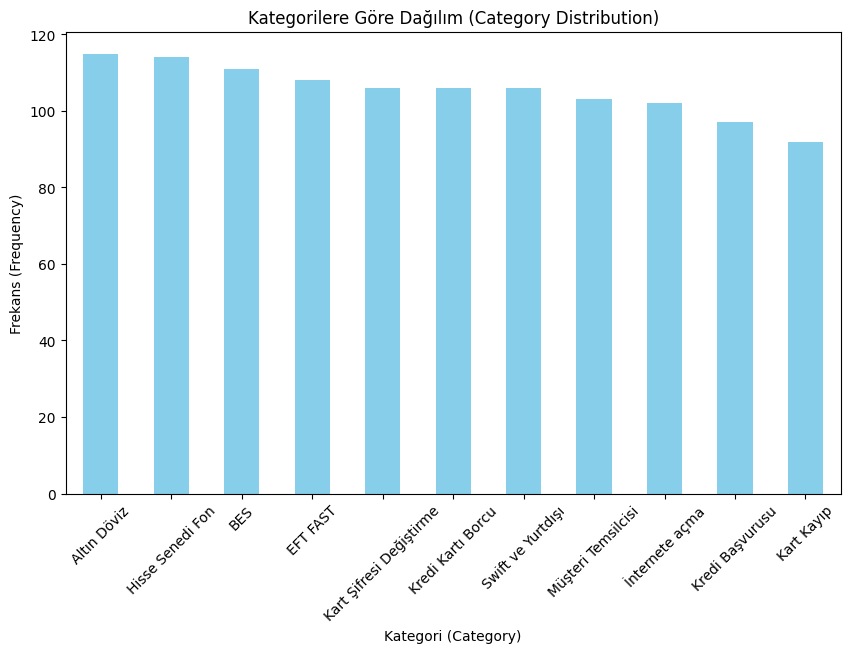

In [64]:
# Kategorilerin dağılımını inceleyelim (Analyze category distribution)
category_counts = data['kategori'].value_counts()

# Kategori dağılımını görselleştirelim (Visualize category distribution)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Kategorilere Göre Dağılım (Category Distribution)')
plt.ylabel('Frekans (Frequency)')
plt.xlabel('Kategori (Category)')
plt.xticks(rotation=45)
plt.show()


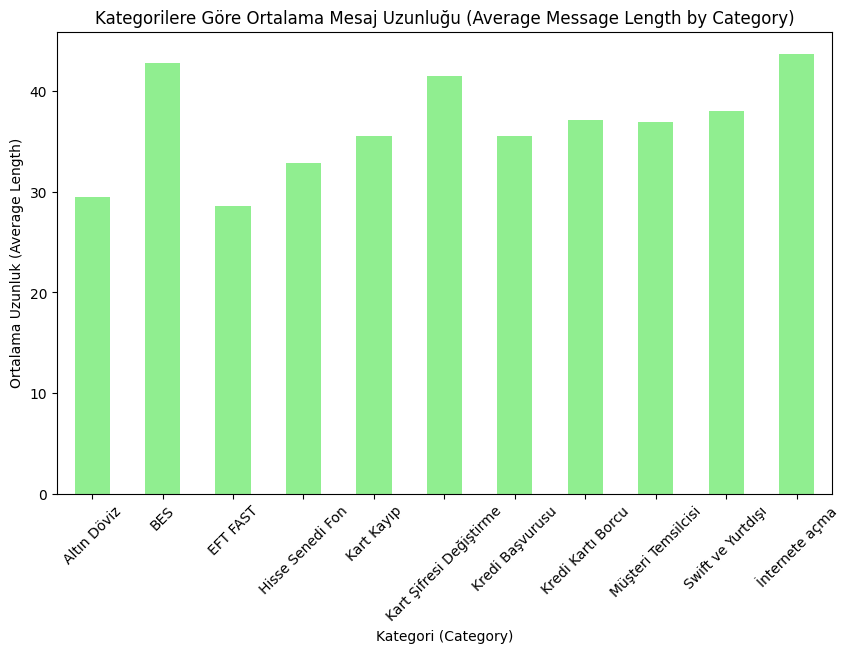

In [66]:
# Mesaj uzunluklarını hesaplayalım (Calculate message lengths)
data['mesaj_uzunlugu'] = data['metin'].apply(len)

# Kategorilere göre ortalama mesaj uzunluğunu hesaplayalım (Calculate average message length by category)
average_length_by_category = data.groupby('kategori')['mesaj_uzunlugu'].mean()

# Sonuçları görselleştirelim (Visualize the results)
plt.figure(figsize=(10, 6))
average_length_by_category.plot(kind='bar', color='lightgreen')
plt.title('Kategorilere Göre Ortalama Mesaj Uzunluğu (Average Message Length by Category)')
plt.ylabel('Ortalama Uzunluk (Average Length)')
plt.xlabel('Kategori (Category)')
plt.xticks(rotation=45)
plt.show()


In [76]:
# LDA için veri hazırlama (Prepare data for LDA)
lda_vectorizer = TfidfVectorizer(stop_words='english')
lda_X = lda_vectorizer.fit_transform(data['metin'])

In [78]:
# LDA modelini eğitme (Train the LDA model)
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda_model.fit_transform(lda_X)


In [80]:
# Her temanın anahtar kelimelerini çıkaralım (Extract top words for each topic)
def get_top_words(model, feature_names, n_top_words=10):
    topic_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        topic_words[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in top_words_idx]
    return topic_words

# Temaların en önemli kelimelerini alalım (Get the top words for each topic)
top_words = get_top_words(lda_model, lda_vectorizer.get_feature_names_out())


In [82]:
# Temaları anlamlı bir şekilde isimlendirelim (Name the topics based on top words)
topic_names = {
    "Topic 1": "Kredi Kartı ve Ödeme",  # Kredi kartı ve ödeme ile ilgili kelimeler
    "Topic 2": "Şifre ve Güvenlik",     # Şifre ve güvenlikle ilgili kelimeler
    "Topic 3": "Müşteri Hizmetleri",    # Müşteri hizmetleri ile ilgili kelimeler
    "Topic 4": "Kampanyalar ve İndirim", # Kampanya ve indirimle ilgili kelimeler
    "Topic 5": "Hesap İşlemleri"        # Hesap işlemleri ile ilgili kelimeler
}

# Temaların kelimelerini ve anlamlarını gösterelim (Display top words and meanings)
for topic, words in top_words.items():
    print(f"{topic} - {topic_names.get(topic, topic)}:")
    print(", ".join(words))
    print("\n")


Topic 1 - Kredi Kartı ve Ödeme:
bes, hesabım, bilgi, almak, miyim, istiyorum, detaylı, hakkında, paramı, amerika


Topic 2 - Şifre ve Güvenlik:
transferi, para, fiyatı, nedir, kadar, ne, nasıl, iptal, istiyorum, fon


Topic 3 - Müşteri Hizmetleri:
kredi, kartımın, altın, rica, yardım, lütfen, kartımı, istiyorum, şifresini, öğrenmek


Topic 4 - Kampanyalar ve İndirim:
yapmak, kredisi, kart, istiyorum, ihtiyaç, şifremi, çekmek, para, yurtdışına, başvurusu


Topic 5 - Hesap İşlemleri:
ile, istiyorum, swift, fast, açmak, göndermek, para, kartımı, bireysel, fonu




In [84]:
# Her kategori için temasal dağılımı (Topic distribution for each category)
topic_distributions = {}
for category in data['kategori'].unique():
    category_data = data[data['kategori'] == category]
    category_lda = lda_model.transform(lda_vectorizer.transform(category_data['metin']))
    topic_distributions[category] = category_lda.mean(axis=0)


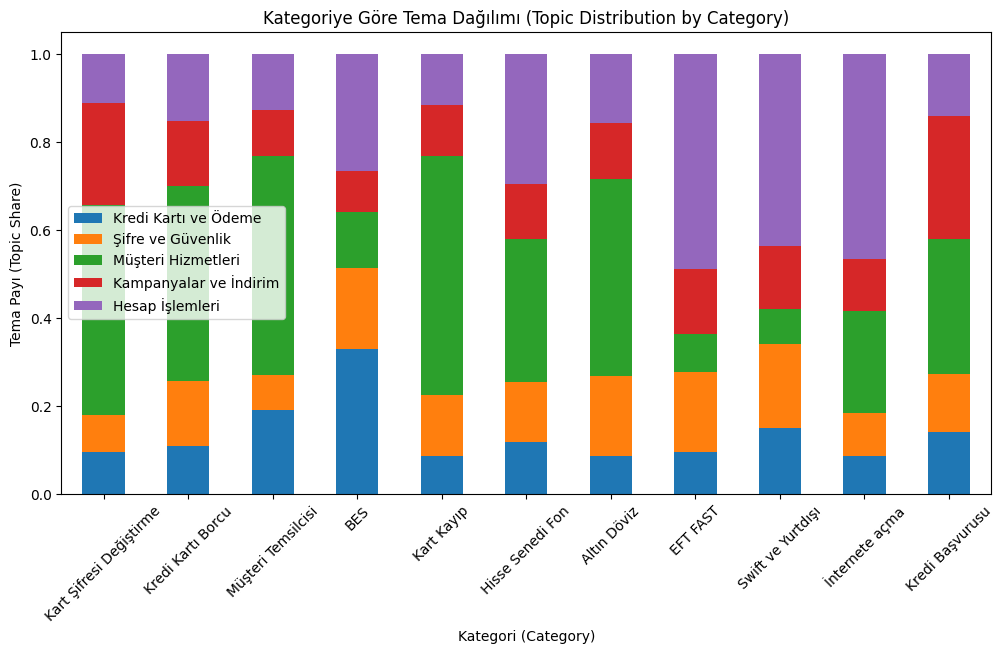

In [86]:
# Sonuçları görselleştirelim (Visualize the results)
topic_df = pd.DataFrame(topic_distributions, index=[topic_names.get(f"Topic {i+1}", f"Topic {i+1}") for i in range(5)]).T
topic_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Kategoriye Göre Tema Dağılımı (Topic Distribution by Category)')
plt.ylabel('Tema Payı (Topic Share)')
plt.xlabel('Kategori (Category)')
plt.xticks(rotation=45)
plt.show()